In [1]:
from qiskit import * #import everything for quantum circuit

In [2]:
qr = QuantumRegister(2)

In [3]:
#Classical bits
cr = ClassicalRegister(2)

In [4]:
#Create circuit
circuit = QuantumCircuit(qr, cr)

In [5]:
#Drawing
%matplotlib inline

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

In [7]:
#For creating entanglement: Hadamardgate, Applying on the first gate
circuit.h(qr[0])

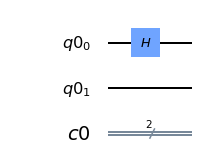

In [8]:
#Description
circuit.draw(output = 'mpl') 

In [9]:
#Two qubit operation: CX gate, qr[0]: affected, qr[1]: location 
circuit.cx(qr[0], qr[1])

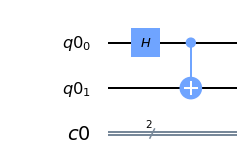

In [10]:
#With this two gates, we can generate entanglement between Q00 and Q01
circuit.draw(output = 'mpl')

In [11]:
#Measure the quantum bits, and store them in to the classical bits.
circuit.measure(qr, cr)

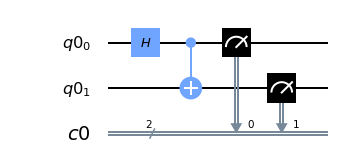

In [12]:
circuit.draw(output = 'mpl')

In [13]:
#simulator will be imported from Aer
simulator = Aer.get_backend('qasm_simulator')

In [19]:
temp = execute(circuit, backend = simulator)
result = temp.result()

In [20]:
#What is the result?
from qiskit.tools.visualization import plot_histogram

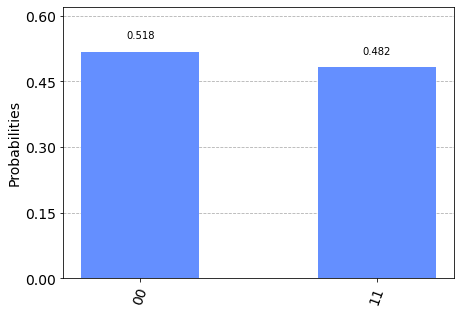

In [24]:
#Error occured because we are doing on the limited number of shots, instead of using infinited number of shots
#Expected 0.5 , 0.5
plot_histogram(result.get_counts(circuit))

In [25]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider = IBMQ.get_provider('ibm-q')

In [27]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [28]:
job = execute(circuit, backend = qcomp)

In [29]:
# Jobs are submitted to real devices, not qasm
from qiskit.tools.monitor import job_monitor

In [30]:
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result()

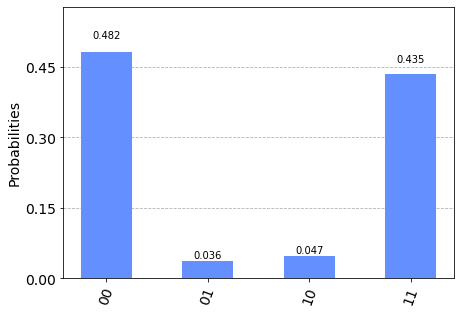

In [32]:
#Real device result, accept small errors. qasm = perfect, job = has errors
plot_histogram(result.get_counts(circuit))